<a href="https://colab.research.google.com/github/GodKelvin/pos-ia-dados-ufes/blob/main/Vis%C3%A3o%20Computacional%20com%20Aprendizado%20Profundo/Laborat%C3%B3rio_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visão Computacional com Aprendizado Profundo

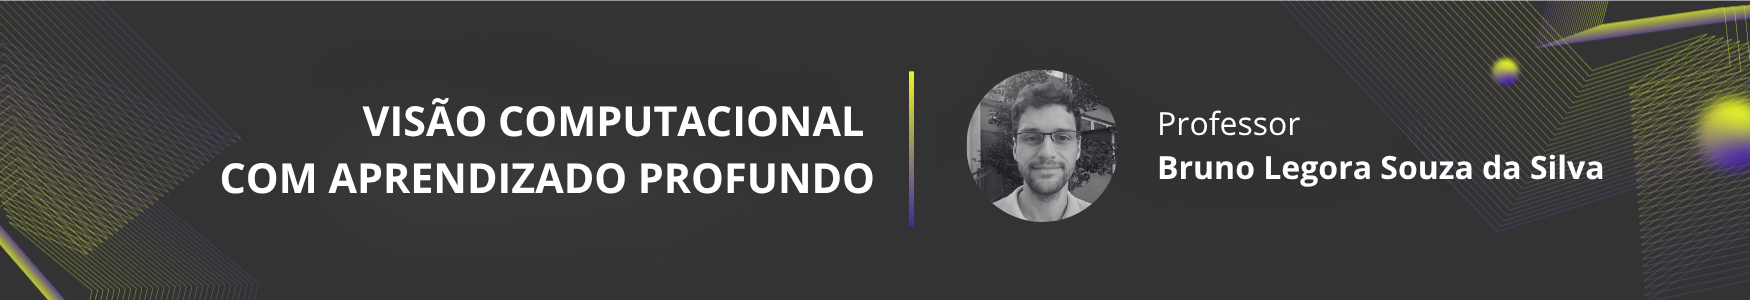



# Laboratório 1 - Como trabalhar com Imagens em Python

Neste laboratório, vocês verão como podemos trabalhar com imagens usando a Linguagem de programação Python.

Existem algumas bibliotecas que permitem manipulação de imagens.

Destaco aqui algumas:

- Pillow

- Matplotlib

- OpenCV


Iremos ver ao menos 3 formas de se carregar uma imagem via arquivo. Para iniciar, execute a primeira célula para baixar uma imagem **aleatória** de um site e salvá-la como o arquivo "image.jpg". Toda vez que você executar esse código, uma imagem diferente irá aparecer.

Caso você prefira, faça upload de uma imagem qualquer no ambiente de execução deste notebook com esse mesmo nome, e ignore a célula abaixo.

In [1]:
!wget https://picsum.photos/384/216 -O image.jpg -q

# Carregando imagens
### Forma 1 - Pillow



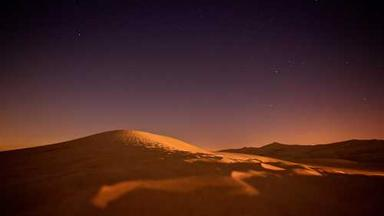

JPEG
RGB


In [3]:
from PIL import Image

imagem = Image.open("image.jpg")

display(imagem)

# Mostra o formato do arquivo
print(imagem.format)

# Mostra o modo de cores do arquivo
print(imagem.mode)

### Forma 2 - Matplotlib

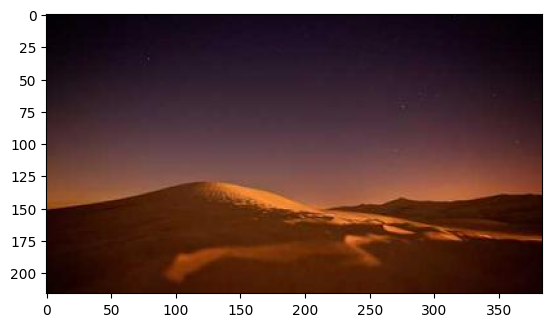

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Lê a imagem
img = mpimg.imread('image.jpg')

# Output Images
plt.imshow(img)


### Forma 3 - OpenCV

In [2]:
# Codigo feito para se usar APENAS no vscode
import cv2
from matplotlib import pyplot as plt
def cv2_imshow(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

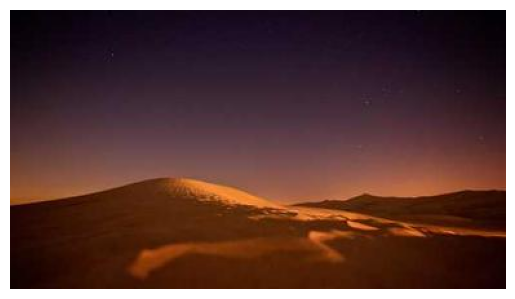

In [3]:
import cv2

# Lê imagem JPG
img = cv2.imread('image.jpg')

# O google colab possui algumas questões com a função imshow da biblioteca OpenCV,
# e por isso, disponibiliza um "patch" para que ela possa ser utilizada.

# from google.colab.patches import cv2_imshow

cv2_imshow(img)


Existem diversas formas de se lidar com imagens em Python. Iremos adotar, por enquanto, a biblioteca OpenCV para realizar todo o processamento de imagens da disciplina.

A função imread carrega a imagem como uma estrutura de n matrizes (onde n é o número de canais de cor) do numpy, que vocês já devem ter conhecido em outras disciplinas.

Por padrão, o OpenCV utiliza o formato BGR, onde primeiro canal de cor representa a cor azul (Blue), o segundo representa a cor verde (Green), e o terceiro representa a cor vermelha (Red).

Por se tratar de uma estrutura da biblioteca numpy, todas as operações de matrizes do numpy são suportadas. Vemos alguns exemplos na célula abaixo:


(216, 384, 3)


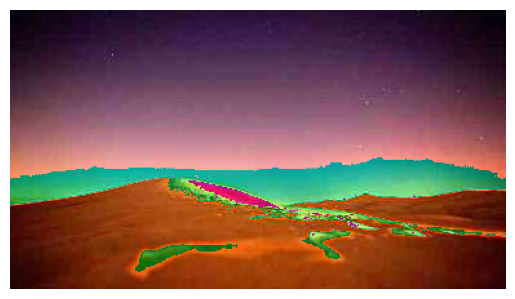

In [4]:
print(img.shape) # 216 pixels de altura, por 384 de largura e 3 "canais de cor"

img2 = img*2 # Uma operação qualquer nas matrizes

cv2_imshow(img2) # Veja o que aconteceu abaixo. O resultado é estranho mesmo


O acesso a elementos dessa matriz é feito da mesma forma que uma array do numpy. Vocês conseguem ver exatamente um número de cada posição de um pixel.

Alterem as posições abaixo e vejam os valores das cores. Em geral, cada pixel de cada canal de cor de uma imagem é representado por um número inteiro de 8 bits (sem sinal), ou seja, por um número inteiro de 0 a 255, onde 0 indica ausência de luz, e 255 indica intensidade máxima naquele pixel.

Tentem encontrar uma posição com intensidade máxima (cor branca) e uma com intensidade mínima (cor preta)

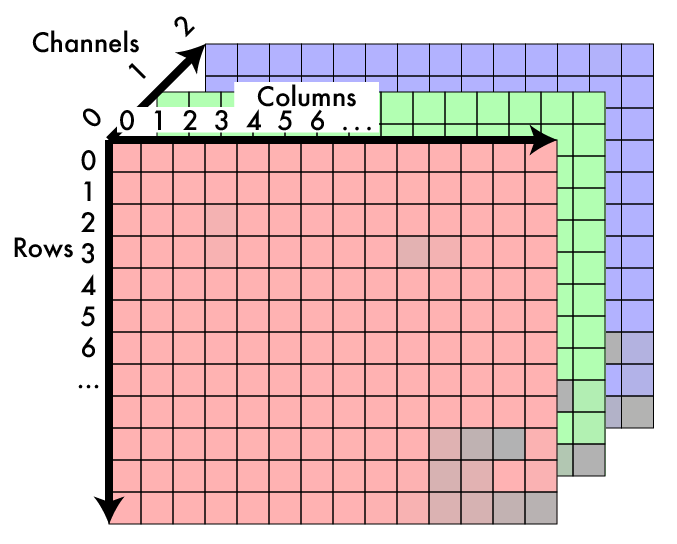

In [18]:
linha = 0
coluna = 0
canal = 0

img[linha,coluna,canal]

##------- Encontrando os valores maximos e minimos da imagem

linha_max = 0
coluna_max = 0
canal_max = 0
valor_max = img[linha, coluna, canal]

linha_min = 0
coluna_min = 0
canal_min = 0
valor_min = img[linha, coluna, canal]


img_shape = img.shape
for lin in range(0, img_shape[0]):
  for col in range(0, img_shape[1]):
    for canal in range(0, img_shape[2]):
      #Checando o valor maximo
      if(img[lin, col, canal] > valor_max):
        linha_max = lin
        coluna_max = col
        canal_max = canal
        valor_max = img[lin, col, canal]

      #Checando valor minimo
      if(img[lin, col, canal] < valor_min):
        linha_min = lin
        coluna_min = col
        canal_min = canal
        valor_min = img[lin, col, canal]

print(linha_max, coluna_max, canal_max, valor_max)
print(linha_min, coluna_min, canal_min, valor_min)


#-------- Usando o numpy
import numpy as np

pos_max = np.unravel_index(np.argmax(img), img.shape)
pos_min = np.unravel_index(np.argmin(img), img.shape)

print("Máximo:", pos_max, img[pos_max])
print("Mínimo:", pos_min, img[pos_min])



143 167 2 255
0 77 1 0
Máximo: (np.int64(143), np.int64(167), np.int64(2)) 255
Mínimo: (np.int64(0), np.int64(77), np.int64(1)) 0


## Redimensionar Imagens

Para diminuir o tamanho de imagens, podemos adotar duas estratégias:

1 - "Descartar" linhas e colunas da imagem (Como falado no slide).

2 - Usar um algoritmo para redimensionar.

Já para aumentar o tamanho, precisamos usar um algoritmo para redimensionar.

Esses algoritmos, em geral, são algoritmos de interpolação. Algumas opções são:

- Copia o valor do vizinho mais próximo
- Interpolação Linear (https://en.wikipedia.org/wiki/Linear_interpolation)
- Interpolação Bicúbica (https://en.wikipedia.org/wiki/Bicubic_interpolation)
- Lanczos (https://en.wikipedia.org/wiki/Lanczos_algorithm)

Vamos a um exemplo. Fiquem a vontade para alterar os valores e analisar se há alguma diferença.





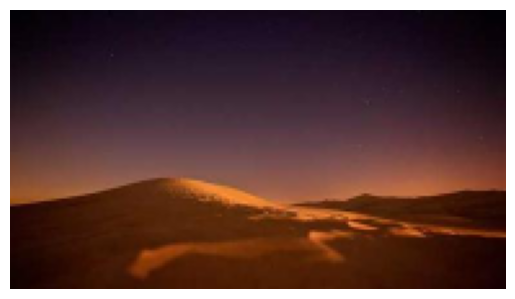

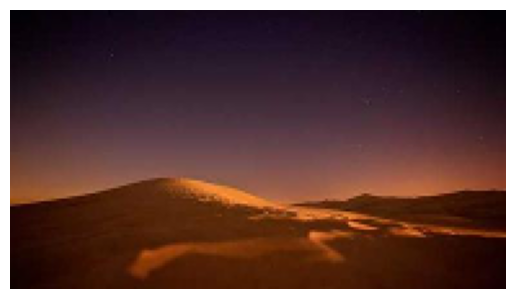

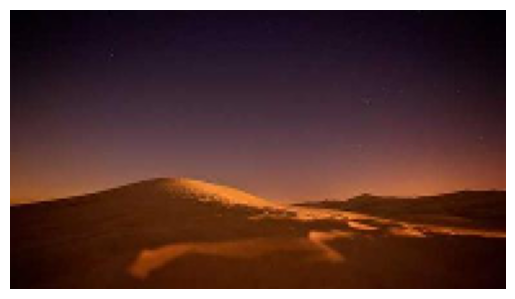

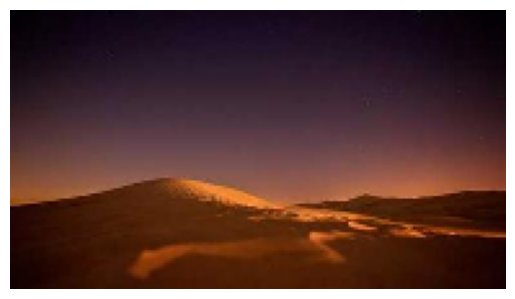

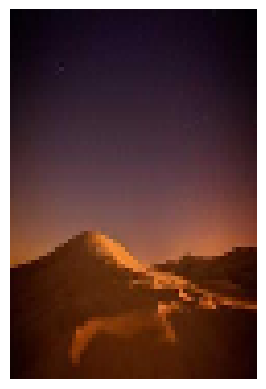

In [21]:
# MUITO CUIDADO AQUI. O OpenCV trata tamanhos como (largura, altura), mas a
# array que armazena imagens é indexada passando (linha, coluna), onde linha
# representa a posição "na altura" e coluna representa a posição "na largura".

novo_tamanho = (192,108) # O número de canais é mantido


img_res = cv2.resize(img,novo_tamanho,interpolation=cv2.INTER_LINEAR)
img_res2 = cv2.resize(img,novo_tamanho,interpolation=cv2.INTER_CUBIC)
img_res3 = cv2.resize(img,novo_tamanho,interpolation=cv2.INTER_LANCZOS4)
cv2_imshow(img_res)
cv2_imshow(img_res2)
cv2_imshow(img_res3)


img2 = img.copy()
img2 = img2[::2,::2,:] # Pega de 2 em 2 linhas e 2 em 2 colunas
cv2_imshow(img2)

# Façam um teste. Como que, usando a estratégia de "jogar fora as colunas e
# linhas", conseguimos uma imagem 160 (L) x 90 (A)?


novo_tamanho = (60,90)
img_res4 = cv2.resize(img,novo_tamanho,interpolation=cv2.INTER_LINEAR)
cv2_imshow(img_res4)

## Canais de Cor

Para finalizar esse laboratório, vamos aprender a lidar com os canais de cor.

Iremos ver aqui 3 possíveis

- Escala de Cinza (1 canal de cor)
- RGB/BGR (3 canais de cor)
- HSV (https://pt.wikipedia.org/wiki/HSV)

Tanto a escala de cinza quanto o RGB/BGR trabalham com matriz cujos valores vão de 0 a 255, e esses valores indicam exatamente a intensidade da respectiva cor na imagem.

O OpenCV suporta diversos canais de cor. Consultem a documentação para outros (https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)

Para converter imagens de um tipo para outros, podemor usar a função cvtColor da biblioteca OpenCV, como mostra abaixo:

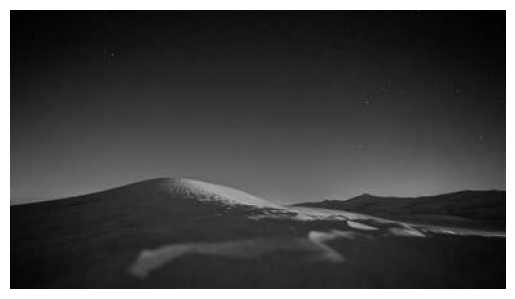

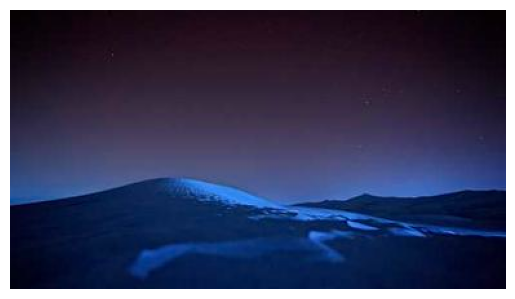

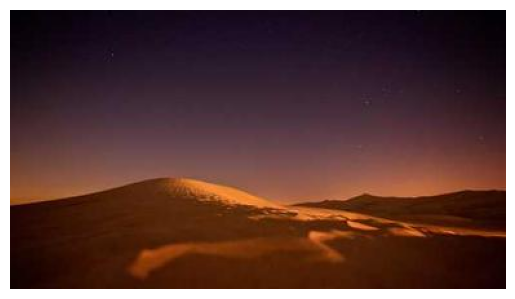

In [22]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img_bgr = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2BGR)

cv2_imshow(img_gray)

# A função cv2_imshow espera o formato BGR para uma imagem de 3 canais.
# Como estamos passando uma RGB, estamos "trocando" a cor R pela B e vice-versa.
cv2_imshow(img_rgb)

# A imagem volta ao normal
cv2_imshow(img_bgr)

In [24]:
# Uma imagem em tons de cinza (grayscale) é uma matriz com valores
# entre 0 e 255:

linha = 0
coluna = 0

img_gray[linha,coluna]


np.uint8(2)

Já o canal HSV funciona de forma um pouco diferente. A conversão é feita da mesma forma, com a função cvtColor e a "flag" COLOR_XXX2HSV, onde XXX é o formato original da imagem.

Porém, o formato HSV representa as cores da seguinte forma:

- H (Matiz) - Verifica o tipo de cor, abrangendo todas as cores do espectro, desde o vermelho até o violeta, mais o magenta. Assumem valores de 0 a 360º (no OpenCV, assumem valores de de 0 a 180º)
- Saturação - Também chamado de "pureza". Quanto menor esse valor, a cor será mais parecida com um tom de cinza. Quanto maior o valor, mais "pura" é a imagem. Atinge valores de 0 a 100% (ou 0 a 1).
- Valor (brilho) - Define o brilho da cor. Assumem valores de 0 a 100%.

Vale ressalvar que os canais S e V são porcentagens representadas de 0 (0%) e 255 (100%) no OpenCV.

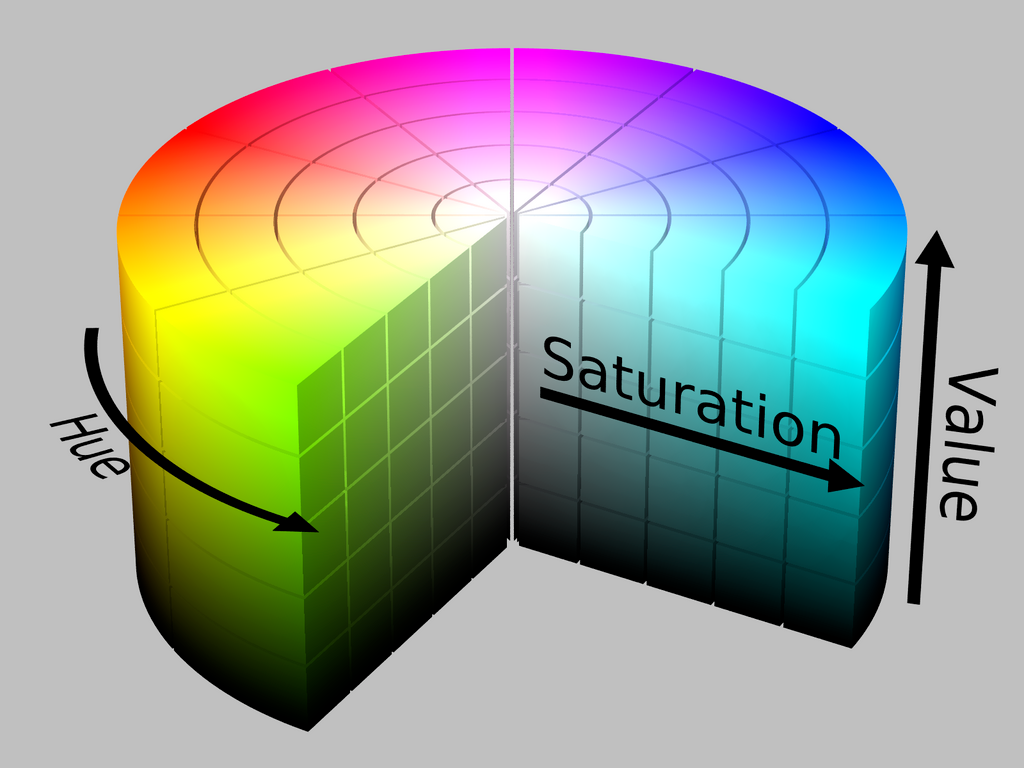

In [25]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

linha = 0
coluna = 0
canal = 0 # 0 para H, 1 para S, 2 para V

img_hsv[linha,coluna,canal]
# Tente encontrar, na imagem abaixo, onde se a cor da imagem está correta.
# (Lembre que o opencv representa os ângulos de 0 a 180, então se o resultado
# for 60, você deve procurar por 120º)



np.uint8(126)

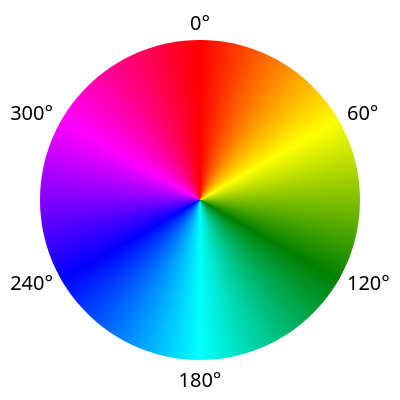




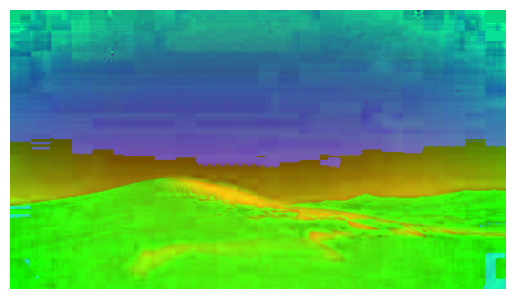

In [26]:
# Novamente, a função espera o formato BGR e recebe valores diferentes!

cv2_imshow(img_hsv)

No próximo laboratório, iremos fazer algumas transformações de cor!